# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
! pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=d30d7518ff1ae7a495703ba03307af5121d9bcc4213c0d03b8e48f777c83de86
  Stored in directory: /Users/nikhilsanghi/Library/Caches/pip/wheels/15/a4/f5/a7431ca9ac466505e866f76a55ae9f94192eafb0f634fce49f
Successfully built stats
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [139]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,tiecorrect
from scipy.stats import f,f_oneway
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot
import stats

# Kruskal's Test

In [8]:
df=pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [20]:
df["Random_Group"] = np.random.choice(["g1","g2","g3"],size=len(df))

In [21]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [22]:
df["Random_Group"].value_counts()

g1    64
g3    59
g2    57
Name: Random_Group, dtype: int64

<AxesSubplot:xlabel='Product', ylabel='Income'>

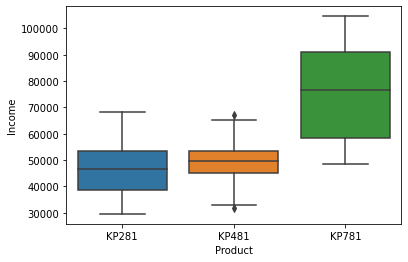

In [23]:
sns.boxplot(x="Product",y="Income",data=df)

<AxesSubplot:xlabel='Random_Group', ylabel='Income'>

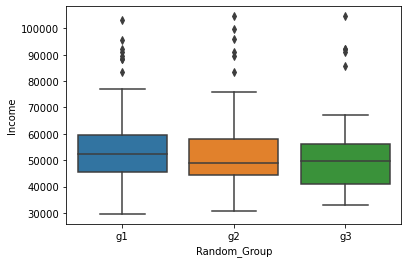

In [24]:
sns.boxplot(x="Random_Group",y="Income",data=df)

In [25]:
income_g1 = df.loc[df["Random_Group"]=="g1","Income"]
income_g2 = df.loc[df["Random_Group"]=="g2","Income"]
income_g3 = df.loc[df["Random_Group"]=="g3","Income"]

In [26]:
income_281 = df.loc[df["Product"]=="KP281","Income"]
income_481 = df.loc[df["Product"]=="KP481","Income"]
income_781 = df.loc[df["Product"]=="KP781","Income"]

In [27]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3 ( Atleast one of them is different)

f_stat,p_value=f_oneway(income_g1,income_g2,income_g3)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.6613031750500675
p_value :  0.5174488136636879
Interpretation : Fail to Reject Ho


In [28]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3 ( Atleast one of them is different)

f_stat,p_value=f_oneway(income_281,income_481,income_781)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  89.25903546601671
p_value :  1.5644991316342494e-27
Interpretation : Reject Ho


<AxesSubplot:xlabel='Income', ylabel='Density'>

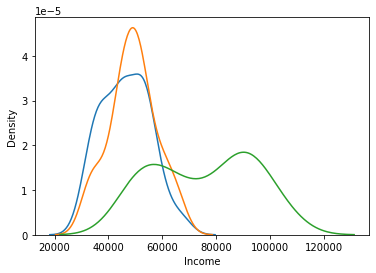

In [30]:
sns.kdeplot(income_281)
sns.kdeplot(income_481)
sns.kdeplot(income_781)

<AxesSubplot:xlabel='Income', ylabel='Density'>

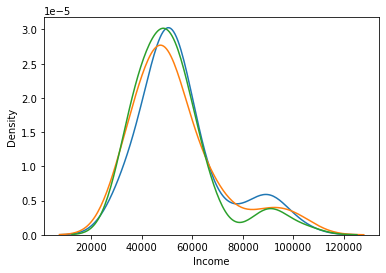

In [31]:
sns.kdeplot(income_g1)
sns.kdeplot(income_g2)
sns.kdeplot(income_g3)

In [32]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3 ( Atleast one of them is different)

f_stat,p_value=kruskal(income_281,income_481,income_781)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  61.43670384567185
p_value :  4.562357014275808e-14
Interpretation : Reject Ho


# QQ Plot

In [33]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height', ylabel='Density'>

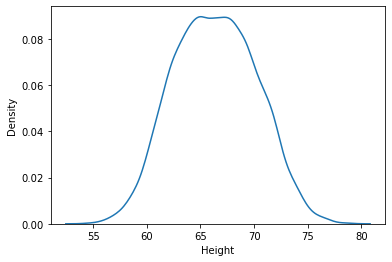

In [34]:
sns.kdeplot(df["Height"])

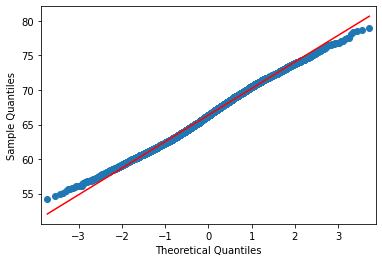

In [39]:
qqplot(df["Height"],line="s")
plt.show()

In [38]:
df1=pd.read_csv("waiting_time.csv")
df1

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


<AxesSubplot:xlabel='time', ylabel='Density'>

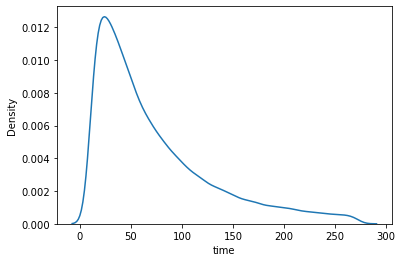

In [40]:
sns.kdeplot(df1["time"])

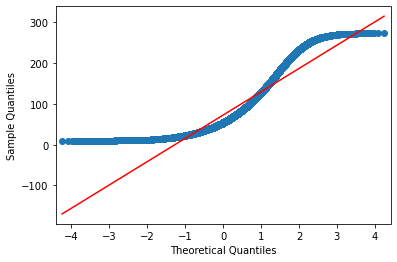

In [41]:
qqplot(df1["time"],line="s")
plt.show()a

# KS Test

In [42]:
df=pd.read_csv("Sachin_ODI.csv")
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


In [43]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [44]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

<AxesSubplot:xlabel='runs', ylabel='Density'>

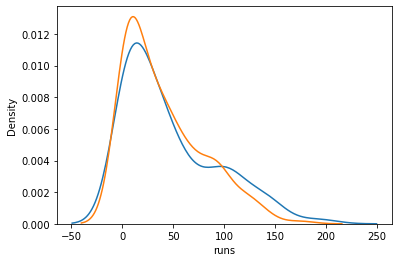

In [45]:
sns.kdeplot(df_first_innings["runs"])
sns.kdeplot(df_second_innings["runs"])

In [46]:
# Ho : mu1 = mu2
# Ha : mu1 != mu2
ttest_ind(df_first_innings["runs"],df_second_innings["runs"])

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [47]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [48]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

<AxesSubplot:xlabel='runs', ylabel='Density'>

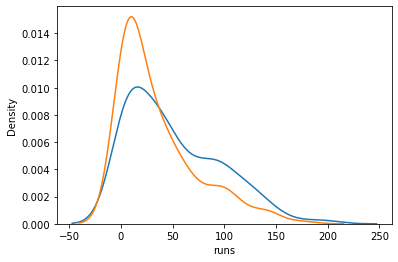

In [49]:
sns.kdeplot(df_won["runs"])
sns.kdeplot(df_lost["runs"])

In [51]:
# Ho : mu1 = mu2
# Ha : mu1 != mu2
ttest_ind(df_won["runs"],df_lost["runs"])

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

In [52]:
e1=ECDF(df_won["runs"])
e2=ECDF(df_lost["runs"])

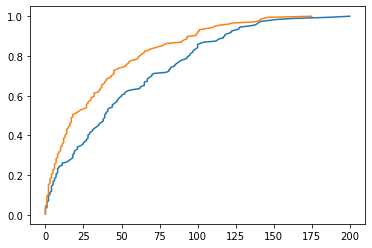

In [54]:
plt.plot(e1.x,e1.y)
plt.plot(e2.x,e2.y)


In [ ]:
ttest_ind(df_first_innings["runs"],df_second_innings["runs"])

In [56]:
e3=ECDF(df_first_innings["runs"])
e4=ECDF(df_second_innings["runs"])

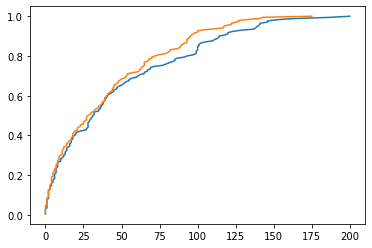

In [57]:
plt.plot(e3.x,e3.y)
plt.plot(e4.x,e4.y)


In [58]:
ttest_ind(df_first_innings["runs"],df_second_innings["runs"])

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [59]:
ttest_ind(df_won["runs"],df_lost["runs"])

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

In [60]:
kstest(df_first_innings["runs"],df_second_innings["runs"])

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

In [61]:
kstest(df_won["runs"],df_lost["runs"])

KstestResult(statistic=0.20602766798418973, pvalue=0.0007769531141107455)

In [62]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height', ylabel='Density'>

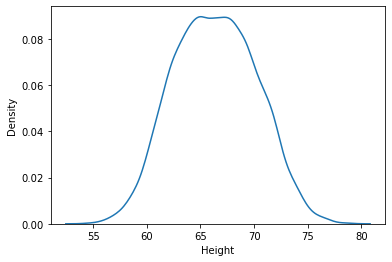

In [64]:
sns.kdeplot(df1["Height"])

In [67]:
z_height=(df1["Height"]-df1["Height"].mean())/df1["Height"].std()
z_height


0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: Height, Length: 10000, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

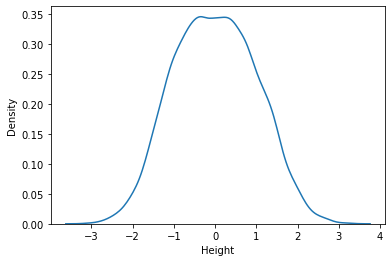

In [68]:
sns.kdeplot(z_height)

In [69]:
kstest(z_height,norm.cdf)

KstestResult(statistic=0.025544360542152145, pvalue=4.219576644053219e-06)

In [71]:
norm.cdf

TypeError: 'method' object is not iterable

In [85]:
def simulate_two_gaussians(n_samples, n_simulations=1000, mu1=0, s1=1):
    samples_1 = [np.random.normal(loc=mu1, scale=s1, size=n_samples) for i in range(n_simulations )]
    means_1 = np.mean(samples_1, axis=1)
    sns.kdeplot(means_1)
    return means_1

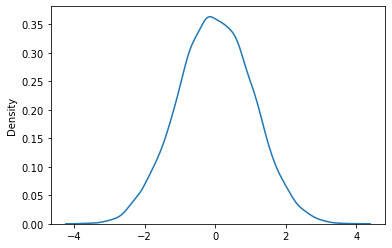

In [129]:
n_samples = 30
n_simulations = 10000
mu1 = 0
s1 = 5.7
z=simulate_two_gaussians(n_samples=n_samples, n_simulations=n_simulations, mu1=mu1, s1=s1)

<AxesSubplot:ylabel='Density'>

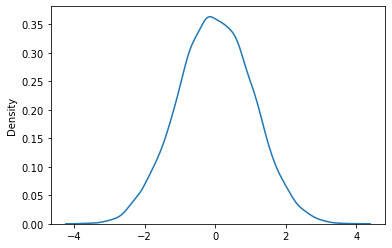

In [130]:
sns.kdeplot(z)

In [131]:
e3=ECDF(z)
e4=ECDF(z_height)

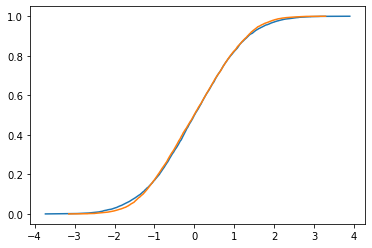

In [132]:
plt.plot(e3.x,e3.y)
plt.plot(e4.x,e4.y)

In [133]:
z.std()

1.055455681241126

In [134]:
z_height.std()

0.9999999999999983

In [128]:
kstest(z,z_height)

KstestResult(statistic=0.0354, pvalue=7.20709550606515e-06)

In [144]:
rng = np.random.default_rng()
x = stats.norm.rvs(size=100, random_state=rng)

<AxesSubplot:xlabel='Height', ylabel='Density'>

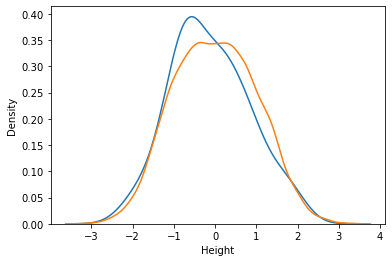

In [149]:
sns.kdeplot(x)
sns.kdeplot(z_height)

In [153]:
stats.kstest(z_height, stats.norm.cdf)

KstestResult(statistic=0.025544360542152145, pvalue=4.219576644053219e-06)

In [157]:
# Ho : Data is Gaussian
# Ha : Data is not Gaussian
shapiro(df1["Height"])

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960622191429138, pvalue=8.158031071868303e-16)

In [159]:
shapiro(z)

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997034072875977, pvalue=0.14827217161655426)

# Levene Test

In [160]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [161]:
height_men = df1[df1["Gender"]=="Male"]["Height"]
height_women = df1[df1["Gender"]=="Female"]["Height"]

In [162]:
height_men.mean()

69.02634590621737

In [163]:
height_women.mean()

63.708773603424916

In [164]:
height_men.var()

8.19884325252049

In [165]:
height_women.var()

7.269947493670132

In [167]:
# Ho : Var is Equal
# Ha : Var is NOT Equal
levene(height_men,height_women)

# There is statiscally significant difference between the variance of 2 samples

LeveneResult(statistic=12.284910854677701, pvalue=0.0004586349895436178)

# Loan Dataset

In [169]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [170]:
df.shape

(614, 13)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [172]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [173]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

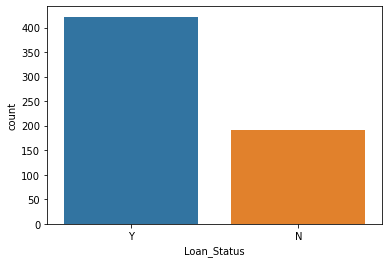

In [175]:
sns.countplot(df["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

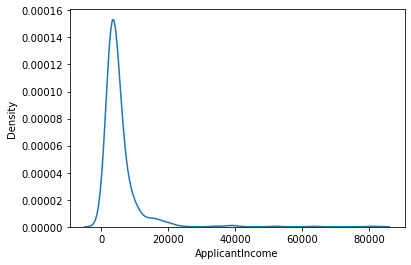

In [176]:
sns.kdeplot(df["ApplicantIncome"])

In [178]:
df.groupby(["Loan_Status"])["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [179]:
df_acc=df.loc[df["Loan_Status"]=="Y"]["ApplicantIncome"]
df_rej=df.loc[df["Loan_Status"]=="N"]["ApplicantIncome"]

In [180]:
ttest_ind(df_acc,df_rej)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

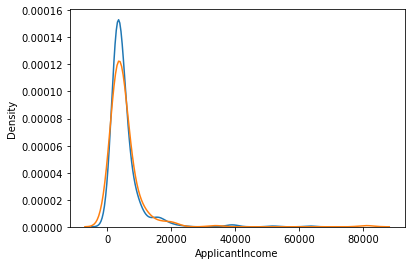

In [182]:
sns.kdeplot(df_acc)
sns.kdeplot(df_rej)

In [183]:
kstest(df_acc,df_rej)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325084)

In [184]:
bins=[0, 2500, 4000, 6000, 8000, 10000, 81000]
labels=['Low','Average','medium', 'h1', 'h2', 'Very high']
df["Income_bins"]=pd.cut(df["ApplicantIncome"],bins=bins,labels=labels)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1


In [186]:
pd.crosstab(df["Loan_Status"],df["Income_bins"])

Income_bins,Low,Average,medium,h1,h2,Very high
Loan_Status,,,,,,
N,34,67,45,20,9,17
Y,74,159,98,34,22,35


In [187]:
chi2_contingency(pd.crosstab(df["Loan_Status"],df["Income_bins"]))

(1.2390175474316056,
 0.941079844721327,
 5,
 array([[ 33.77198697,  70.67100977,  44.71661238,  16.88599349,
           9.69381107,  16.26058632],
        [ 74.22801303, 155.32899023,  98.28338762,  37.11400651,
          21.30618893,  35.73941368]]))

In [ ]:
Income_bin = pd.crosstab(df["Income_bins"],df["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

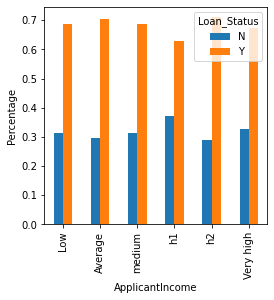

In [188]:
Income_bin = pd.crosstab(df["Income_bins"],df["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()